#Monitoramento das causas de estresse nos alunos de hoje

##Importando bibliotecas

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import math

##Checando os dados

In [2]:
df = pd.read_csv('Stress_Dataset.csv')

In [3]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [4]:
df.columns

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

###Dicionário de colunas

* Gender: gênero do estudante; 0 (Male), 1 (Female)
* Age: Idade numérica (18 a 21)

####Indicadores emocionais e de estresse

* Have you recently experienced stress in your life?: Você passou por algum estresse recentemente?
* Have you noticed a rapid heartbeat or palpitations?: Você notou batimentos cardíacos acelerados ou palpitações?
* Have you been dealing with anxiety or tension recently?: Você tem lidado com ansiedade ou tensão recentemente?
* Do you face any sleep problems or difficulties falling asleep?: Você enfrenta algum problema de sono ou dificuldade para dormir?
* Do you have trouble concentrating on your academic tasks?: Você tem dificuldade para se concentrar em suas tarefas acadêmicas?
* Have you been feeling sadness or low mood?: Você tem se sentido triste ou de mau humor?
* Do you get irritated easily?: Você se irrita facilmente?
* Do you often feel lonely or isolated?: Você costuma se sentir solitário ou isolado?

####Indicadores Físicos e de Saúde

* Have you been getting headaches more often than usual?: Você tem tido dores de cabeça com mais frequência do que o normal?
* Have you been experiencing any illness or health issues?: Você tem enfrentado alguma doença ou problema de saúde?
* Have you gained/lost weight?: Você ganhou/perdeu peso?
####Estressores Acadêmicos e Ambientais
* Do you feel overwhelmed with your academic workload?: Você se sente sobrecarregado com sua carga de trabalho acadêmica?
* Are you in competition with your peers, and does it affect you?: Você está competindo com seus colegas e isso afeta você?
* Do you lack confidence in your academic performance?: Você não tem confiança no seu desempenho acadêmico?
* Do you lack confidence in your choice of academic subjects?: Você não tem confiança na sua escolha de disciplinas acadêmicas?
* Academic and extracurricular activities conflicting for you?: Atividades acadêmicas e extracurriculares são conflitantes para você?
* Do you attend classes regularly?: Você frequenta as aulas regularmente?
* Are you facing any difficulties with your professors or instructors?: Você está enfrentando alguma dificuldade com seus professores ou instrutores?
* Is your working environment unpleasant or stressful?: Seu ambiente de trabalho é desagradável ou estressante?
* Is your hostel or home environment causing you difficulties?: O seu albergue ou ambiente doméstico está lhe causando dificuldades?

####Fatores sociais e de relacionamento

* Do you find that your relationship often causes you stress?: Você acha que seu relacionamento frequentemente lhe causa estresse?
* Do you struggle to find time for relaxation and leisure activities?: Você tem dificuldade em encontrar tempo para relaxamento e atividades de lazer?

####Variável de destino

* Which type of stress do you primarily experience?: Eustress, Distress, No Stress Que tipo de estresse você vivencia principalmente?: Eustresse, Angústia, Sem Estresse

###Sobre o conjunto de dados:

O presente conjunto de dados reúne as respostas de 843 estudantes universitários, com idades entre 18 e 21 anos, a respeito de suas experiências relacionadas a estresse, saúde, relacionamentos, desempenho acadêmico e bem-estar emocional.

As informações foram obtidas por meio de um questionário online aplicado via Google Forms, utilizando uma escala Likert de cinco pontos, que variava de “Nem um pouco” a “Extremamente”. Todas as respostas foram coletadas de forma anônima, assegurando a confidencialidade e a privacidade dos participantes.

###Dicionário de respostas

| Faixa de avaliação original | Descrição          | Categoria simplificada |
|----------------------------|--------------------|------------------------|
| 1 – None                   | Nenhum             | Below median (1–2)     |
| 2 – Little                 | Pouco              | Below median (1–2)     |
| 3 – Some                   | Algum              | Median (3)             |
| 4 – Quite a bit            | Bastante           | Above median (4–5)     |
| 5 – Very much              | Muito              | Above median (4–5)     |


##Análise descritiva

In [5]:
print(f'O dataset tem {df.shape[0]} linhas')
print(f'O dataset tem {df.shape[1]} colunas')

O dataset tem 843 linhas
O dataset tem 26 colunas


In [6]:
df.info(26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

O conjunto de dados é composto por 25 variáveis numéricas, correspondentes às questões avaliadas em escala Likert de 1 a 5, além de 1 variável categórica em formato de texto.

Não foram identificados valores ausentes (nulos) no dataset, o que garante a consistência das análises.

Na sequência, será realizado o cálculo do total de respostas para cada coluna dentro da escala de 1 a 5. Para melhor organização e clareza, os resultados serão apresentados em cinco tabelas distintas, o que permitirá uma visualização estruturada.

In [7]:
# Lista das colunas que possuem respostas na escala 1–5
colunas_escala1 = [
'Have you recently experienced stress in your life?', 
'Have you noticed a rapid heartbeat or palpitations?',
'Have you been dealing with anxiety or tension recently?', 
'Do you face any sleep problems or difficulties falling asleep?', 
'Have you been dealing with anxiety or tension recently?.1'] #Retorna apenas as perguntas na escala de 1 a 5.

# Criar tabela resumo com contagem de valores (1–5) para cada coluna
tabela_resumo1 = df[colunas_escala1].apply(pd.Series.value_counts).sort_index()
#apply(pd.Series.value_counts): Para cada coluna, Conta quantas vezes cada valor (1,2,3,4,5) aparece.
#Cria um DataFrame onde: Índice = valores da escala (1–5), Colunas = perguntas, Valores = contagem de respostas
#.sort_index(): Garante que os valores apareçam na ordem correta (1 a 5).

# Exibir a tabela
tabela_resumo1.head()

,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1
1,78,106,193,158,177
2,219,282,247,215,250
3,263,222,217,215,180
4,193,178,124,159,152
5,90,55,62,96,84


In [8]:
colunas_escala2 = [
'Have you been getting headaches more often than usual?',
'Do you get irritated easily?', 
'Do you have trouble concentrating on your academic tasks?', 
'Have you been feeling sadness or low mood?',
'Have you been experiencing any illness or health issues?']


tabela_resumo2 = df[colunas_escala2].apply(pd.Series.value_counts).sort_index()
tabela_resumo2.head()

,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,Have you been feeling sadness or low mood?,Have you been experiencing any illness or health issues?
1,190,203,197,186,218
2,234,186,198,253,207
3,204,208,211,206,232
4,129,151,135,121,109
5,86,95,102,77,77


In [9]:
colunas_escala3 = [
'Do you often feel lonely or isolated?', 
'Do you feel overwhelmed with your academic workload?',
'Are you in competition with your peers, and does it affect you?', 
'Do you find that your relationship often causes you stress?', 
'Are you facing any difficulties with your professors or instructors?']


tabela_resumo3 = df[colunas_escala3].apply(pd.Series.value_counts).sort_index()
tabela_resumo3.head()

,Do you often feel lonely or isolated?,Do you feel overwhelmed with your academic workload?,"Are you in competition with your peers, and does it affect you?",Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?
1,232,237,207,219,216
2,222,198,262,223,252
3,194,216,202,222,221
4,128,130,102,106,90
5,67,62,70,73,64


In [10]:
colunas_escala4 = [
'Is your working environment unpleasant or stressful?', 
'Do you struggle to find time for relaxation and leisure activities?', 
'Is your hostel or home environment causing you difficulties?', 
'Do you lack confidence in your academic performance?', 
'Do you lack confidence in your choice of academic subjects?']


tabela_resumo4 = df[colunas_escala4].apply(pd.Series.value_counts).sort_index()
tabela_resumo4.head()

,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?
1,206,220,242,220,205
2,249,224,247,200,209
3,219,215,182,225,211
4,108,111,98,109,119
5,61,73,74,89,99


In [11]:
colunas_escala5 = [
'Academic and extracurricular activities conflicting for you?',
'Do you attend classes regularly?', 
'Have you gained/lost weight?']


tabela_resumo5 = df[colunas_escala5].apply(pd.Series.value_counts).sort_index()
tabela_resumo5.head()

,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
1,157,85,194
2,234,135,300
3,203,238,213
4,155,247,91
5,94,138,45


Esses valores podem ser visualizados em formato percentual por meio de gráficos de barras, o que possibilita uma análise mais clara, intuitiva e comparativa dos resultados entre as diferentes questões.

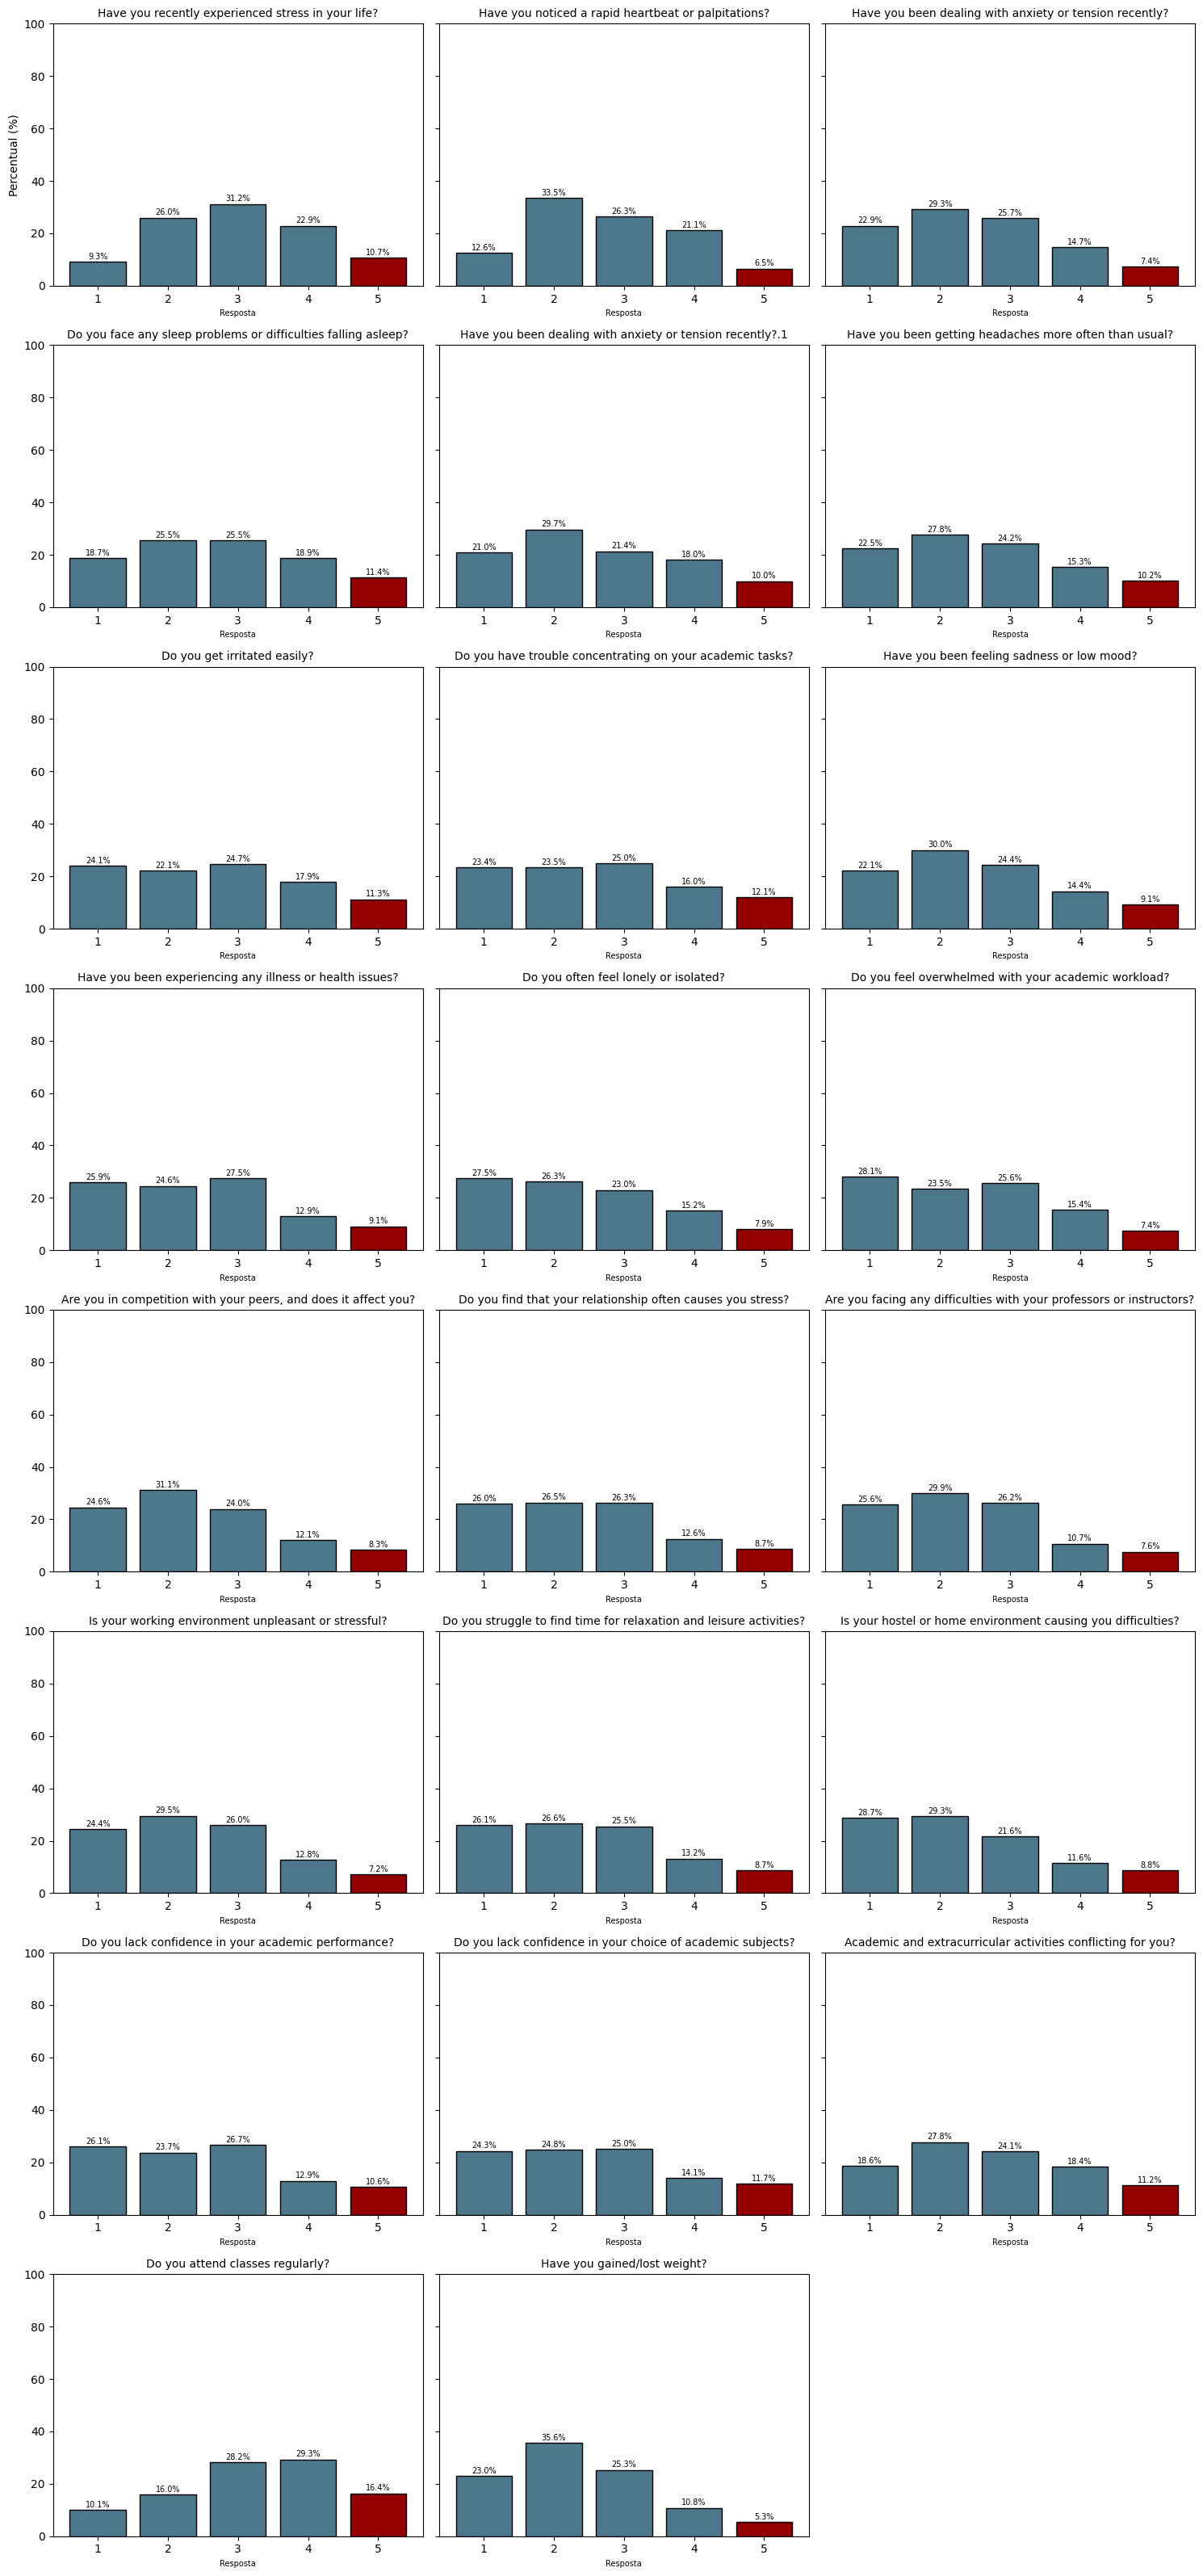

In [12]:
# Copiar o DataFrame original
df2 = df.copy()

# Lista de colunas a serem analisadas
variaveis = [
    "Have you recently experienced stress in your life?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Have you been dealing with anxiety or tension recently?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Have you been dealing with anxiety or tension recently?.1", 'Have you been getting headaches more often than usual?',
'Do you get irritated easily?', 'Do you have trouble concentrating on your academic tasks?', 'Have you been feeling sadness or low mood?',
'Have you been experiencing any illness or health issues?','Do you often feel lonely or isolated?', 'Do you feel overwhelmed with your academic workload?',
'Are you in competition with your peers, and does it affect you?', 'Do you find that your relationship often causes you stress?', 
'Are you facing any difficulties with your professors or instructors?','Is your working environment unpleasant or stressful?', 
'Do you struggle to find time for relaxation and leisure activities?', 'Is your hostel or home environment causing you difficulties?', 
'Do you lack confidence in your academic performance?', 'Do you lack confidence in your choice of academic subjects?', 'Academic and extracurricular activities conflicting for you?',
'Do you attend classes regularly?', 'Have you gained/lost weight?'  
] #Contém 23 perguntas (nomes das colunas). Cada pergunta vira um gráfico separado.

# Definir layout: 3 gráficos por linha
num_graficos = len(variaveis)
colunas_por_linha = 3
linhas = math.ceil(num_graficos / colunas_por_linha) # Calcula quantas linhas serão necessárias

# Criar figura com múltiplas linhas e colunas de subplots
fig, axes = plt.subplots(linhas, colunas_por_linha, figsize=(15, linhas * 4), sharey=True)
axes = axes.flatten() 
#plt.subplots(linhas, colunas_por_linha) cria a grade de gráficos.
#figsize=(15, linhas * 4) define tamanho proporcional ao número de linhas.
#sharey=True faz todos os gráficos compartilharem a mesma escala no eixo Y (comparação facilitada).
#axes.flatten() transforma a matriz de eixos (axes) em lista única, para iterar facilmente no loop.

for ax, coluna in zip(axes, variaveis): #zip(axes, variaveis) percorre cada subplot (ax) e cada pergunta (coluna) simultaneamente.
   
    # Calcular percentuais por resposta (1 a 5)
    valores = df2[coluna].value_counts(normalize=True).sort_index() * 100
    #value_counts(normalize=True) conta valores em proporção (0–1).
    # *100 converte para percentual (0–100).
    #sort_index() organiza as respostas na ordem 1,2,3,4,5.

    # Definir cores: azul padrão, resposta 5 em vermelho
    cores = ['#4d778b' if i != 5 else '#920000' for i in valores.index]
    #Respostas 1–4 → azul escuro (#4d778b).
    #Resposta 5 (Muito estressado) → vermelho escuro (#920000).

    # Plotar barras
    ax.bar(valores.index, valores.values, color=cores, edgecolor='black')
    #edgecolor='black' adiciona contorno preto nas barras.

    # Personalização do gráfico
    ax.set_title(coluna, fontsize=10) #Título = nome da pergunta (coluna).
    ax.set_xticks([1,2,3,4,5]) #X-axis fixo em 1 a 5.
    ax.set_ylim(0, 100) #Y-axis limitado de 0 a 100 (%).
    ax.set_xlabel('Resposta', fontsize=7) #Rótulo do eixo X = "Resposta".
    
    # Adicionar percentuais acima das barras
    for i, v in zip(valores.index, valores.values):
        ax.text(i, v+1, f"{v:.1f}%", ha='center', fontsize=7) #v+1 posiciona o texto um pouco acima da barra.

# Remover gráficos extras vazios (se houver)
for i in range(len(variaveis), len(axes)):
    fig.delaxes(axes[i])
    #Se a grade tiver mais subplots do que perguntas, os extras são apagados (última linha incompleta).

# Y-label apenas no primeiro gráfico
axes[0].set_ylabel('Percentual (%)') #Define o rótulo do eixo Y apenas no primeiro gráfico de cada linha (para não poluir os outros).

plt.tight_layout() #ajusta o espaçamento automático entre os gráficos.
plt.show() #exibe a figura final.

Pode-se observar nos gráficos uma maior prevalência de respostas 2, 3 e 4. Questões relacionadas a sobrecarga acadêmica, competição entre colegas, ambiente de estudo/trabalho e falta de lazer apresentam percentuais consideráveis entre 25 e 30%. Isso sugere um grau de estresse constante, ainda não extremo, que afeta boa parte da amostra coletada.

A resposta 5, colocada em vermelho como destaque por ser o nível mais alto de problema, aparece em baixo percentual (<15%). Algumas perguntas apresentam destaque no nível máximo (5), indicando situações críticas para parte dos participantes:Problemas de sono (~11%), ansiedade/tensão (~10%), irritação fácil (~11%), falta de confiança no desempenho acadêmico (~10%). Isso mostra que uma minoria enfrenta grandes dificuldades nesses aspectos.

A resposta 1, que indica que o entrevistado não possui nenhum problema, também tende a ser baixa em várias questões, indicando que poucos participantes estão livres de estresse ou dificuldades. 

O gráfico a seguir traz a média percentual das respostas das questões:

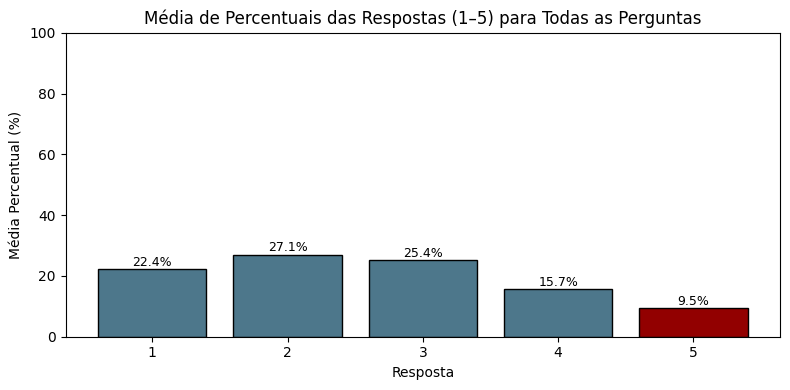

In [13]:
# Calcular tabela com percentuais por resposta (1-5) para todas as variáveis
tabela_percentuais = df2[variaveis].apply(pd.Series.value_counts, normalize=True).sort_index() * 100

# Calcular a média de percentual de cada resposta (1–5)
media_percentuais = tabela_percentuais.mean(axis=1)

# Definir cores: azul para 1–4 e vermelho para 5
cores = ['#4d778b' if i != 5 else '#920000' for i in media_percentuais.index]

# Criar gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(media_percentuais.index, media_percentuais.values, color=cores, edgecolor='black')

# Personalizar gráfico
plt.xticks([1,2,3,4,5])
plt.ylim(0,100)
plt.xlabel('Resposta')
plt.ylabel('Média Percentual (%)')
plt.title('Média de Percentuais das Respostas (1–5) para Todas as Perguntas')

# Adicionar valores acima das barras
for i, v in zip(media_percentuais.index, media_percentuais.values):
    plt.text(i, v+1, f"{v:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

Respostas 2 e 3 foram as mais frequentes com (27,1%) e (25,4%) respectivamente. Indicando que a maioria dos participantes se encontram entre “sentindo-se bem” e “um pouco estressado”. Essa concentração sugere que a maioria está em um estado de equilíbrio aceitável, mas com sinais de atenção em níveis medianos (resposta 3).
Importante ressaltar que a resposta 3 revela um nível de estresse mediano e esse grupo pode evoluir para níveis mais críticos se não houver suporte adequado.

Resposta 1 (22,4%) também é bastante considerável, mostrando um grupo relevante que relata nenhum estresse.

Respostas 4 (15,7%) e 5 (9,5%) são as menores, demonstrando que uma minoria expressa níveis elevados de estresse ou problemas significativos. Somando-se as respostas 4 e 5 chega-se a um total de 25,2%,significando que um quarto da amostra apresenta sinais de estresse significativo ou alto, que merece atenção preventiva.

A situação geral não é altamente crítica, mas há uma porção relevante com estresse moderado a alto.

O dicionário de respostas nos traz um agrupameto das opções resultando na categoria simplificada (Below Median, Median, Above Median). A tabela a seguir mostra o percentual que cada categoria obteve pela optativa dos participantes.

In [14]:
def categorizar_resposta(x):
    if x in [1, 2]:
        return 'Below Median'
    elif x == 3:
        return 'Median'
    elif x in [4, 5]:
        return 'Above Median'
    else:
        return None  # caso tenha valores nulos ou inválidos

df_categoria = df[variaveis].apply(lambda col: col.map(categorizar_resposta))

In [15]:
tabela_categorias = df_categoria.apply(pd.Series.value_counts, normalize=True) * 100
tabela_categorias = tabela_categorias.transpose()
tabela_categorias.head(23)

,Above Median,Below Median,Median
Have you recently experienced stress in your life?,33.570581,35.231317,31.198102
Have you noticed a rapid heartbeat or palpitations?,27.639383,46.026097,26.334520
Have you been dealing with anxiety or tension recently?,22.064057,52.194543,25.741400
Do you face any sleep problems or difficulties falling asleep?,30.249110,44.246738,25.504152
Have you been dealing with anxiety or tension recently?.1,27.995255,50.652432,21.352313
Have you been getting headaches more often than usual?,25.504152,50.296560,24.199288
Do you get irritated easily?,29.181495,46.144721,24.673784
Do you have trouble concentrating on your academic tasks?,28.113879,46.856465,25.029656
Have you been feeling sadness or low mood?,23.487544,52.075919,24.436536
Have you been experiencing any illness or health issues?,22.064057,50.415184,27.520759


O que representam as categorias?

Below Median (1–2) → baixo ou nenhum estresse
Median (3) → estresse moderado
Above Median (4–5) → estresse elevado

A distribuição mostra predominância de respostas 1 e 2, indicando baixo ou nenhum estresse por parte dos entrevistados em diversas áreas. Questões relacionadas a peso, ambiente familiar, professores e competição apresentam baixo estresse, portanto, para a maioria, esses fatores não são problemáticos.

Há uma camada significativa em risco intermediário em saúde física, relacionamentos e ambiente acadêmico – áreas que podem evoluir para maior estresse se não tiverem um acompanhamento adequado.

Entretanto, há exceções com níveis elevados de "Above Median", que merecem atenção. Frequência em aulas tem chamado atenção, quase metade sente alto estresse em relação à assiduidade acadêmica. Estresse geral, sono e irritabilidade também aparecem como pontos críticos, sugerindo impacto significativo na saúde mental e rotina.



Na sequência observa-se o gráfico com o top 5 fatores que podem elevar o nível de estresse dos estudantes

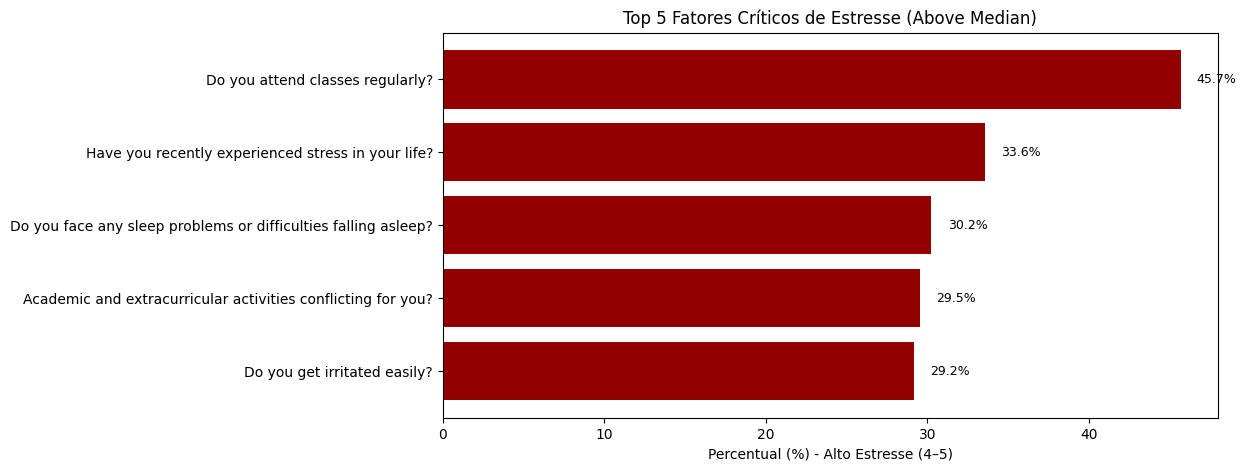

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar DataFrame com os valores (apenas exemplo com as 23 perguntas que você trouxe)
dados = {
    "Pergunta": [
        "Have you recently experienced stress in your life?",
        "Have you noticed a rapid heartbeat or palpitations?",
        "Have you been dealing with anxiety or tension recently?",
        "Do you face any sleep problems or difficulties falling asleep?",
        "Have you been dealing with anxiety or tension recently?.1",
        "Have you been getting headaches more often than usual?",
        "Do you get irritated easily?",
        "Do you have trouble concentrating on your academic tasks?",
        "Have you been feeling sadness or low mood?",
        "Have you been experiencing any illness or health issues?",
        "Do you often feel lonely or isolated?",
        "Do you feel overwhelmed with your academic workload?",
        "Are you in competition with your peers, and does it affect you?",
        "Do you find that your relationship often causes you stress?",
        "Are you facing any difficulties with your professors or instructors?",
        "Is your working environment unpleasant or stressful?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Is your hostel or home environment causing you difficulties?",
        "Do you lack confidence in your academic performance?",
        "Do you lack confidence in your choice of academic subjects?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you attend classes regularly?",
        "Have you gained/lost weight?"
    ],
    "Above Median": [
        33.570581, 27.639383, 22.064057, 30.249110, 27.995255, 25.504152, 29.181495,
        28.113879, 23.487544, 22.064057, 23.131673, 22.775801, 20.403321, 21.233689,
        18.268090, 20.047450, 21.826809, 20.403321, 23.487544, 25.860024, 29.537367,
        45.670225, 16.132859
    ]
}

df_above = pd.DataFrame(dados)

# Selecionar Top 5 em Above Median
top5 = df_above.nlargest(5, "Above Median")

# Plotar gráfico
plt.figure(figsize=(10,5))
bars = plt.barh(top5["Pergunta"], top5["Above Median"], color="#920000")
plt.xlabel("Percentual (%) - Alto Estresse (4–5)")
plt.title("Top 5 Fatores Críticos de Estresse (Above Median)")
plt.gca().invert_yaxis()  # Deixa o maior em cima

# Adicionar rótulos de valores nas barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va="center", fontsize=9)

plt.show()


O fator mais crítico, associa a frequência às aulas a um nível alto de estresse, o que não pode ser confirmado isoladamente, só demonstra que 45,7% dos alunos tem uma alta frequência às aulas.

A segunda maior ocorrência. Mostra que o estresse geral está presente em cerca de 1/3 da amostra, apontando para um grande impacto na vida dos participantes.

Problemas de sono aparecem como um fator relevante. Isso sugere que a qualidade do descanso está sendo comprometida, o que tende a agravar outros sintomas de estresse.

Conflito entre atividades acadêmicas e extracurriculares aparece em quase 30% dos estudantes, mostrando um problema de equilíbrio entre estudo, atividades paralelas e vida pessoal.

Irritabilidade é um sinal clássico de estresse. Quase 1 em cada 3 estudantes relata esse sintoma, reforçando a necessidade de atenção ao impacto emocional da pressão no ambiente acadêmico.

Em seguida tem-se um mapa de calor com a matriz de probabilidade condicional para resposta 5, para verificar a probabilidade de se responder o nível mais alto de estresse em uma dada questão influencia em ter essa mesma escolha em outra pergunta.

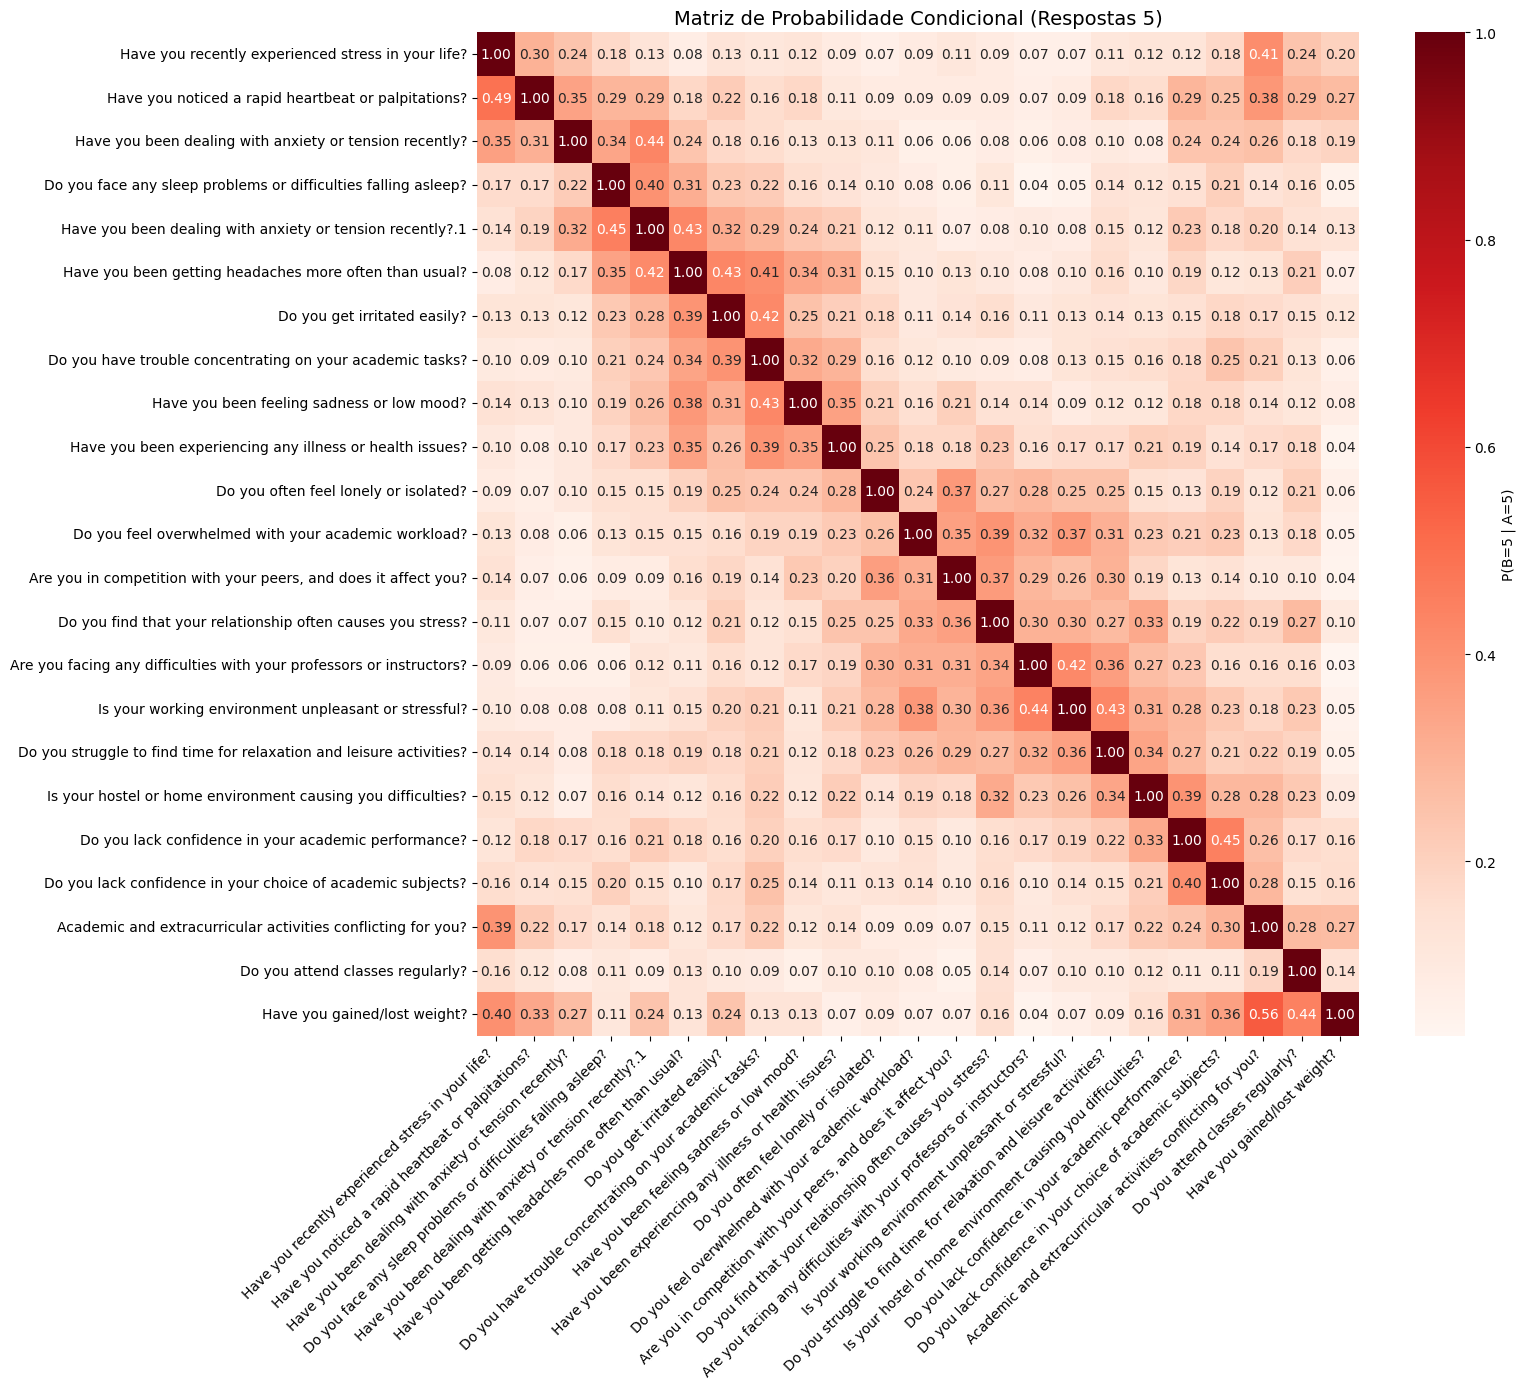

In [17]:
def matriz_condicional(df, variaveis):
    """
    Gera matriz P(B=5 | A=5) para todas as combinações de perguntas.
    """
    matriz = pd.DataFrame(index=variaveis, columns=variaveis, dtype=float)
    
    for pergunta_A in variaveis:
        for pergunta_B in variaveis:
            subset = df[df[pergunta_A] == 5]
            if len(subset) == 0:
                matriz.loc[pergunta_A, pergunta_B] = None
            else:
                matriz.loc[pergunta_A, pergunta_B] = (subset[pergunta_B] == 5).mean()
    
    return matriz

# Lista de perguntas
variaveis = [
    "Have you recently experienced stress in your life?",
        "Have you noticed a rapid heartbeat or palpitations?",
        "Have you been dealing with anxiety or tension recently?",
        "Do you face any sleep problems or difficulties falling asleep?",
        "Have you been dealing with anxiety or tension recently?.1",
        "Have you been getting headaches more often than usual?",
        "Do you get irritated easily?",
        "Do you have trouble concentrating on your academic tasks?",
        "Have you been feeling sadness or low mood?",
        "Have you been experiencing any illness or health issues?",
        "Do you often feel lonely or isolated?",
        "Do you feel overwhelmed with your academic workload?",
        "Are you in competition with your peers, and does it affect you?",
        "Do you find that your relationship often causes you stress?",
        "Are you facing any difficulties with your professors or instructors?",
        "Is your working environment unpleasant or stressful?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Is your hostel or home environment causing you difficulties?",
        "Do you lack confidence in your academic performance?",
        "Do you lack confidence in your choice of academic subjects?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you attend classes regularly?",
        "Have you gained/lost weight?"
]

# Criar matriz
matriz_probs = matriz_condicional(df, variaveis)

# Plotar heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(matriz_probs, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'P(B=5 | A=5)'})
plt.title("Matriz de Probabilidade Condicional (Respostas 5)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


####Análise do Heatmap de Probabilidade Condicional

Observa-se no heatmap que as probabilidades condicionais identificadas variam de baixas a moderadas. A associação mais forte encontrada foi no caso em que, dado que um estudante tenha ganhado ou perdido peso, existe uma probabilidade de 56% de também relatar conflitos com atividades extracurriculares. Embora valores entre 30% e 50% sejam geralmente considerados moderados, em se tratando de saúde mental e bem-estar estudantil, 56% pode ser considerado um indicador preocupante.

Outro achado relevante é que estudantes que relataram batimentos cardíacos acelerados ou palpitações apresentaram uma probabilidade de 49% de também reportarem algum nível de estresse. Além disso, 45% dos alunos que não têm confiança no próprio desempenho acadêmico também não se sentem seguros quanto à escolha das disciplinas.

Algumas associações adicionais também se destacam:

* 44% dos estudantes que relataram ter ganhado peso também frequentam as aulas regularmente.
* O mesmo valor (44%) aparece entre aqueles que vivenciam tensão ou ansiedade e os que têm dores de cabeça frequentes.
* Há uma probabilidade de 43% de que quem sofre com tensão ou ansiedade também apresente cefaleias frequentes, assim como se observa entre quem relata dores de cabeça e maior irritabilidade.
* Entre os que se sentem tristes ou de mau humor, há 43% de chance de também apresentarem dificuldade de concentração nas tarefas acadêmicas.
* Uma associação semelhante (43%) ocorre entre os que consideram o ambiente de trabalho desagradável ou estressante e aqueles que relatam falta de tempo para lazer e relaxamento.

Já no nível de 42%, destacam-se duas relações:

* Estudantes que se irritam facilmente têm maior probabilidade de também apresentar dificuldades de concentração.
* Aqueles que enfrentam problemas com professores ou instrutores apresentam a mesma probabilidade de relatar um ambiente de trabalho desagradável ou estressante.

Por fim, estudantes que já passaram por algum tipo de estresse recente apresentaram 41% de chance de também vivenciarem conflitos entre atividades acadêmicas e extracurriculares, enquanto os que ganharam ou perderam peso mostraram 40% de probabilidade de também terem enfrentado situações estressantes.

De modo geral, a maior parte dos resultados apresenta associações fracas, mas alguns achados (≥40%) merecem destaque, pois sugerem relações importantes entre fatores de saúde mental, hábitos de vida e desempenho acadêmico. Esses indicadores podem servir de base para futuras análises mais aprofundadas e para a construção de estratégias de prevenção e intervenção direcionadas.



Ainda é possível realizar a verificação da média do nível de estresse de acordo com a idade do aluno, conforme gráfico seguinte:

In [18]:
def estresse_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, y=estresse_por_idade.values, hue=estresse_por_idade.index, palette="Reds", edgecolor="black")
    plt.title("Nível Médio de Estresse por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

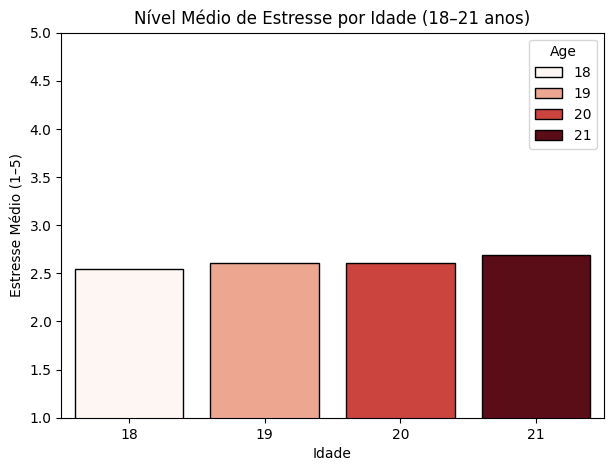

Age
18    2.549012
19    2.610533
20    2.610182
21    2.694227
Name: Estresse_Medio, dtype: float64


In [19]:
colunas_estresse = [
    "Have you recently experienced stress in your life?",
        "Have you noticed a rapid heartbeat or palpitations?",
        "Have you been dealing with anxiety or tension recently?",
        "Do you face any sleep problems or difficulties falling asleep?",
        "Have you been dealing with anxiety or tension recently?.1",
        "Have you been getting headaches more often than usual?",
        "Do you get irritated easily?",
        "Do you have trouble concentrating on your academic tasks?",
        "Have you been feeling sadness or low mood?",
        "Have you been experiencing any illness or health issues?",
        "Do you often feel lonely or isolated?",
        "Do you feel overwhelmed with your academic workload?",
        "Are you in competition with your peers, and does it affect you?",
        "Do you find that your relationship often causes you stress?",
        "Are you facing any difficulties with your professors or instructors?",
        "Is your working environment unpleasant or stressful?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Is your hostel or home environment causing you difficulties?",
        "Do you lack confidence in your academic performance?",
        "Do you lack confidence in your choice of academic subjects?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you attend classes regularly?",
        "Have you gained/lost weight?"
] 

resultado = estresse_18a21(df, "Age", colunas_estresse)
print(resultado)


A variação do nível médio de estresse é pequena, de 2.55 para 18 anos e 2.69 para 21 anos, revelando uma ligeira tendência de aumento no nível de estresse conforme mais velho for o estudante, mas a diferença não é tão espressiva para confirmar essa tendência.

Lembrando que o nível médio das respostas obtidas é em relação ao conjunto de perguntas completo, se levarmos em conta as questões separadas pode haver variação, conforme a verificação por clusters em seguida:


In [20]:
def estresse1_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, y=estresse_por_idade.values, hue=estresse_por_idade.index, palette="Reds", edgecolor="black")
    plt.title("Indicadores emocionais e de estresse por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

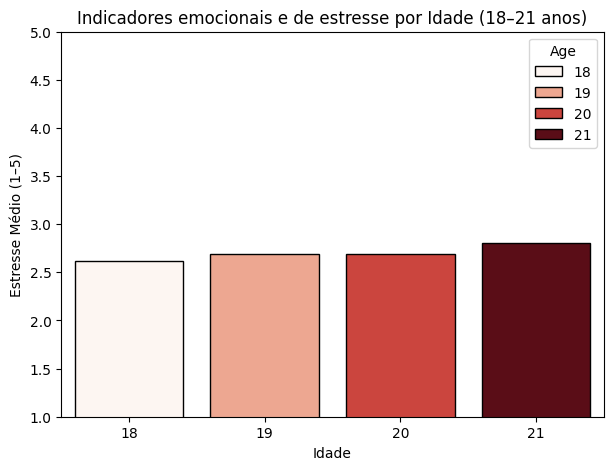

Age
18    2.619318
19    2.687060
20    2.695513
21    2.800205
Name: Estresse_Medio, dtype: float64


In [21]:
colunas_estresse = [
    "Have you recently experienced stress in your life?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Have you been dealing with anxiety or tension recently?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Do you have trouble concentrating on your academic tasks?",
    "Have you been feeling sadness or low mood?",
    "Do you get irritated easily?",
    "Do you often feel lonely or isolated?"
] 

resultado = estresse1_18a21(df, "Age", colunas_estresse)
print(resultado)

Analisando somente os fatores que indicam presença de alterações emocionais e estressores já é possível notar um leve aumento em relação à média geral de estresse verificada anteriormente. Neste caso partindo de 2.62 para 18 anos a 2.80 para 21 anos, demonstrando pequeno aumento conforme a variação da idade do entrevistado.

In [22]:
def estresse2_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, y=estresse_por_idade.values, hue=estresse_por_idade.index, palette="Reds", edgecolor="black")
    plt.title("Indicadores Físicos e de Saúde por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

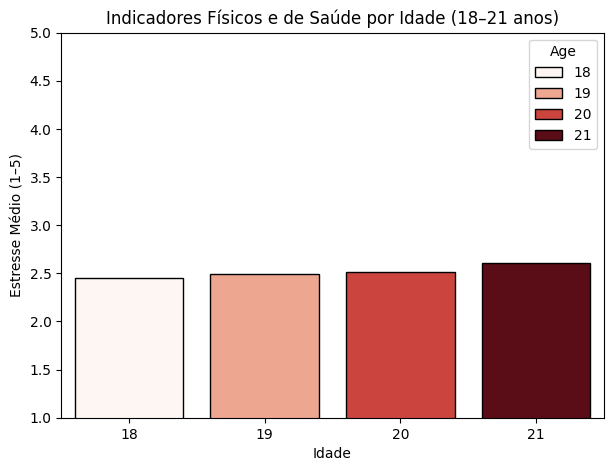

Age
18    2.454545
19    2.494131
20    2.517094
21    2.603825
Name: Estresse_Medio, dtype: float64


In [23]:
colunas_estresse = [
    "Have you been getting headaches more often than usual?",
    "Have you been experiencing any illness or health issues?",
    "Have you gained/lost weight?"
] 

resultado = estresse2_18a21(df, "Age", colunas_estresse)
print(resultado)

A variação da relação dos indicadores físicos e de saúde pela idade foi um pouco maior comparando com aos fatores emocionais e ao nível médio de estresse. A média geral se manteve em um patamar parecido com os mesmos. Novamente indicando aumento no nível de estresse com alunos mais velhos.

In [24]:
def estresse3_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, y=estresse_por_idade.values, hue=estresse_por_idade.index, palette="Reds", edgecolor="black")
    plt.title("Estressores Acadêmicos e Ambientais por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

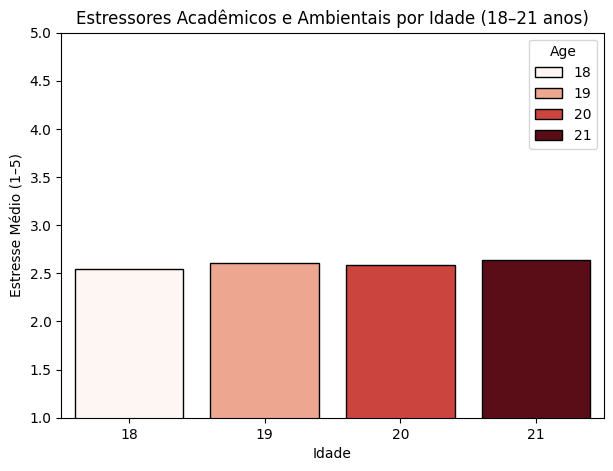

Age
18    2.543434
19    2.607199
20    2.591168
21    2.635701
Name: Estresse_Medio, dtype: float64


In [25]:
colunas_estresse = [
    "Do you feel overwhelmed with your academic workload?",
    "Are you in competition with your peers, and does it affect you?",  
    "Do you lack confidence in your academic performance?",
    "Do you lack confidence in your choice of academic subjects?",
    "Academic and extracurricular activities conflicting for you?",
    "Do you attend classes regularly?",
    "Are you facing any difficulties with your professors or instructors?",
    "Is your working environment unpleasant or stressful?",
"Is your hostel or home environment causing you difficulties?"
] 

resultado = estresse3_18a21(df, "Age", colunas_estresse)
print(resultado)

O nível de estresse no ambiente acadêmico também passou por pouca variação na média geral das respostas para as idades, embora também demonstre ligeiro crescimento da idade de 18 anos para 21 anos.

In [26]:
def estresse4_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, y=estresse_por_idade.values, hue=estresse_por_idade.index, palette="Reds", edgecolor="black")
    plt.title("Fatores sociais e de relacionamento por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

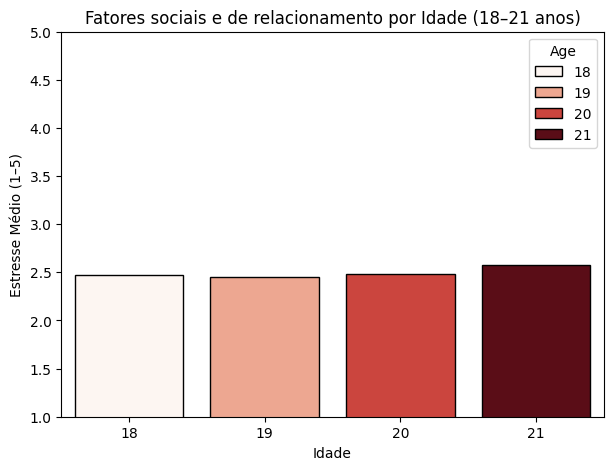

Age
18    2.477273
19    2.450704
20    2.480769
21    2.573770
Name: Estresse_Medio, dtype: float64


In [27]:
colunas_estresse = [
    "Do you find that your relationship often causes you stress?",
    "Do you struggle to find time for relaxation and leisure activities?"
] 

resultado = estresse4_18a21(df, "Age", colunas_estresse)
print(resultado)

A relação de fatores sociais e de relacionamento por idade, assim como as relações já avaliadas até aqui obteve baixa amplitude na variação dos níveis de estresse, com seu pico em 2.57 com 21 anos, sendo um breve aumento em comparação aos 2.48 alcançado com 18 anos.

Os clusters analisados separadamente não tiveram diferenças muito grandes levando em conta a média geral de estresse obtida no gráfico que verifica o nível médio de estresse por idade, foram notáveis apenas pequenas variações como algumas médias mais baixas para 18 anos (como no caso de 2.48 de fatores sociais e relacionamento) e outras mais altas (como 2.80 em indicadores emocionais e de estresse).

Não teve um cluster que teve destaque na realização da relação com a idade, chegando ao final a um nível de estresse mediano, mas que deve ser acompanhado.

Verificando agora a relação com o gênero do entrevistado chegamos ao seguinte resultado:

In [28]:
def estresse_por_genero(df, coluna_genero, colunas_estresse):
    """
    Analisa a relação entre gênero e nível de estresse.
    Mostra gráfico com gêneros no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Calcular estresse médio por gênero
    estresse_genero = df.groupby(coluna_genero)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(
        x=estresse_genero.index,
        y=estresse_genero.values,
        hue=estresse_genero.index,
        palette="Reds",
        edgecolor="black"
    )
    plt.title("Nível Médio de Estresse por Gênero")
    plt.xlabel("Gênero")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # Escala de 1 a 5
    plt.show()

    return estresse_genero


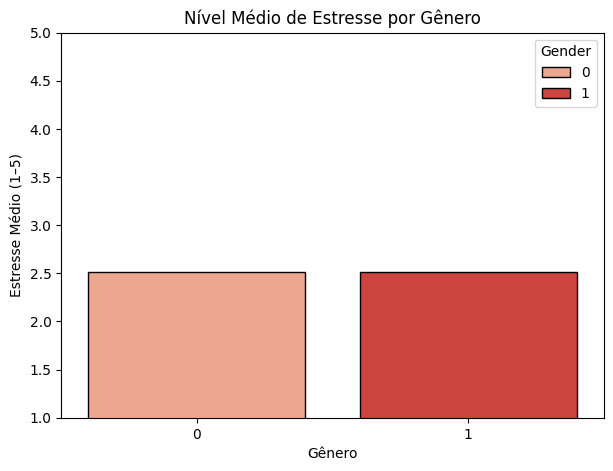

Gender
0    2.517336
1    2.513559
Name: Estresse_Medio, dtype: float64


In [29]:
colunas_estresse = [
    "Do you find that your relationship often causes you stress?",
    "Do you struggle to find time for relaxation and leisure activities?"
]

resultado = estresse_por_genero(df, "Gender", colunas_estresse)
print(resultado)
